In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install statsmodels
import statsmodels.api as sm

import joypy
from matplotlib import cm
from sklearn.datasets import load_iris

#%load_ext lab_black

pd.set_option("max_columns", 500)

In [5]:
df = pd.read_csv("/volumes/roussou/Microscopy/CellAsic/Atp6_NG_x_Atp6_mKate_WT/zygote_after24hrs_plate/all_zygotes/multiExp_AllPos_acdc_output_all_3d_meanProj.csv")
df

,experiment_foldername,Position_n,Cell_ID,frame_i,time_seconds,time_minutes,time_hours,BF_CV,BF_amount_autoBkgr,BF_amount_dataPrepBkgr,BF_amount_manualBkgr,BF_autoBkgr_bkgrVal_mean,BF_autoBkgr_bkgrVal_median,BF_autoBkgr_bkgrVal_q05,BF_autoBkgr_bkgrVal_q25,BF_autoBkgr_bkgrVal_q75,BF_autoBkgr_bkgrVal_q95,BF_concentration_autoBkgr_from_vol_fl,BF_concentration_autoBkgr_from_vol_vox,BF_concentration_dataPrepBkgr_from_vol_fl,BF_concentration_dataPrepBkgr_from_vol_vox,BF_dataPrepBkgr_bkgrVal_mean,BF_dataPrepBkgr_bkgrVal_median,BF_dataPrepBkgr_bkgrVal_q05,BF_dataPrepBkgr_bkgrVal_q25,BF_dataPrepBkgr_bkgrVal_q75,BF_dataPrepBkgr_bkgrVal_q95,BF_manualBkgr_bkgrVal_mean,BF_manualBkgr_bkgrVal_median,BF_manualBkgr_bkgrVal_q05,BF_manualBkgr_bkgrVal_q25,BF_manualBkgr_bkgrVal_q75,BF_manualBkgr_bkgrVal_q95,BF_max,BF_mean,BF_mean_manualBkgr,BF_median,BF_min,BF_q05,BF_q25,BF_q75,BF_q95,BF_sum,NG_CV,NG_amount_autoBkgr,NG_amount_dataPrepBkgr,NG_amount_manualBkgr,NG_autoBkgr_bkgrVal_mean,NG_autoBkgr_bkgrVal_median,NG_autoBkgr_bkgrVal_q05,NG_autoBkgr_bkgrVal_q25,NG_autoBkgr_bkgrVal_q75,NG_autoBkgr_bkgrVal_q95,NG_concentration_autoBkgr_from_vol_fl,NG_concentration_autoBkgr_from_vol_vox,NG_concentration_dataPrepBkgr_from_vol_fl,NG_concentration_dataPrepBkgr_from_vol_vox,NG_dataPrepBkgr_bkgrVal_mean,NG_dataPrepBkgr_bkgrVal_median,NG_dataPrepBkgr_bkgrVal_q05,NG_dataPrepBkgr_bkgrVal_q25,NG_dataPrepBkgr_bkgrVal_q75,NG_dataPrepBkgr_bkgrVal_q95,NG_manualBkgr_bkgrVal_mean,NG_manualBkgr_bkgrVal_median,NG_manualBkgr_bkgrVal_q05,NG_manualBkgr_bkgrVal_q25,NG_manualBkgr_bkgrVal_q75,NG_manualBkgr_bkgrVal_q95,NG_max,NG_mean,NG_mean_manualBkgr,NG_median,NG_min,NG_q05,NG_q25,NG_q75,NG_q95,NG_sum,_NG_3D_manualBkgr_bkgrVal_mean_maxProj,_NG_3D_manualBkgr_bkgrVal_mean_meanProj,_NG_3D_manualBkgr_bkgrVal_mean_zSlice,_NG_3D_manualBkgr_bkgrVal_median_maxProj,_NG_3D_manualBkgr_bkgrVal_median_meanProj,_NG_3D_manualBkgr_bkgrVal_median_zSlice,_NG_3D_manualBkgr_bkgrVal_q05_maxProj,_NG_3D_manualBkgr_bkgrVal_q05_meanProj,_NG_3D_manualBkgr_bkgrVal_q05_zSlice,_NG_3D_manualBkgr_bkgrVal_q25_maxProj,_NG_3D_manualBkgr_bkgrVal_q25_meanProj,_NG_3D_manualBkgr_bkgrVal_q25_zSlice,_NG_3D_manualBkgr_bkgrVal_q75_maxProj,_NG_3D_manualBkgr_bkgrVal_q75_meanProj,_NG_3D_manualBkgr_bkgrVal_q75_zSlice,_NG_3D_manualBkgr_bkgrVal_q95_maxProj,_NG_3D_manualBkgr_bkgrVal_q95_meanProj,_NG_3D_manualBkgr_bkgrVal_q95_zSlice,_mKate_3D_manualBkgr_bkgrVal_mean_maxProj,_mKate_3D_manualBkgr_bkgrVal_mean_meanProj,_mKate_3D_manualBkgr_bkgrVal_mean_zSlice,_mKate_3D_manualBkgr_bkgrVal_median_maxProj,_mKate_3D_manualBkgr_bkgrVal_median_meanProj,_mKate_3D_manualBkgr_bkgrVal_median_zSlice,_mKate_3D_manualBkgr_bkgrVal_q05_maxProj,_mKate_3D_manualBkgr_bkgrVal_q05_meanProj,_mKate_3D_manualBkgr_bkgrVal_q05_zSlice,_mKate_3D_manualBkgr_bkgrVal_q25_maxProj,_mKate_3D_manualBkgr_bkgrVal_q25_meanProj,_mKate_3D_manualBkgr_bkgrVal_q25_zSlice,_mKate_3D_manualBkgr_bkgrVal_q75_maxProj,_mKate_3D_manualBkgr_bkgrVal_q75_meanProj,_mKate_3D_manualBkgr_bkgrVal_q75_zSlice,_mKate_3D_manualBkgr_bkgrVal_q95_maxProj,_mKate_3D_manualBkgr_bkgrVal_q95_meanProj,_mKate_3D_manualBkgr_bkgrVal_q95_zSlice,cell_cycle_stage,corrected_assignment,division_frame_i,emerg_frame_i,generation_num,is_cell_dead,is_cell_excluded,is_history_known,mKate_CV,mKate_amount_autoBkgr,mKate_amount_dataPrepBkgr,mKate_amount_manualBkgr,mKate_autoBkgr_bkgrVal_mean,mKate_autoBkgr_bkgrVal_median,mKate_autoBkgr_bkgrVal_q05,mKate_autoBkgr_bkgrVal_q25,mKate_autoBkgr_bkgrVal_q75,mKate_autoBkgr_bkgrVal_q95,mKate_concentration_autoBkgr_from_vol_fl,mKate_concentration_autoBkgr_from_vol_vox,mKate_concentration_dataPrepBkgr_from_vol_fl,mKate_concentration_dataPrepBkgr_from_vol_vox,mKate_dataPrepBkgr_bkgrVal_mean,mKate_dataPrepBkgr_bkgrVal_median,mKate_dataPrepBkgr_bkgrVal_q05,mKate_dataPrepBkgr_bkgrVal_q25,mKate_dataPrepBkgr_bkgrVal_q75,mKate_dataPrepBkgr_bkgrVal_q95,mKate_manualBkgr_bkgrVal_mean,mKate_manualBkgr_bkgrVal_median,mKate_manualBkgr_bkgrVal_q05,mKate_manualBkgr_bkgrVal_q25,mKate_manua

In [7]:
df = df[
    [
        "experiment_foldername",
        "Position_n",
        "frame_i",
        "Cell_ID",
        "_NG_3D_concentration_autoBkgr_from_vol_fl_meanProj",
        "_mKate_3D_concentration_autoBkgr_from_vol_fl_meanProj",
    ]
]

df["exp_pos"] = df[["experiment_foldername", "Position_n"]].apply(
    "_".join, axis=1
)

df["exp_pos_cell"] = (
    df["experiment_foldername"]
    + "_"
    + df["Position_n"].astype(str)
    + "_"
    + df["Cell_ID"].astype(str)
)

In [8]:
df['h'] = df['_mKate_3D_concentration_autoBkgr_from_vol_fl_meanProj']/(df['_NG_3D_concentration_autoBkgr_from_vol_fl_meanProj'] + df['_mKate_3D_concentration_autoBkgr_from_vol_fl_meanProj']) 

In [39]:
# count cells between the range of 0.5-0.7 for h_raw and btw range 0.4-0.6 for h! 
# these counted cells are the fraction of heteroplasmic cells after 24hrs! 
# the rest from the total amount of cells per zygote/colony are homoplasmic for either fluorophore
count_hetero = len(df[(df['h'] >= 0.33) & (df['h'] <= 0.71)])
all_cells = len(df)
ratio_hetero = (count_hetero / all_cells)*100
ratio_homo = 100 - ratio_hetero 
print(f"Count between 0.25 and 0.85: {count_hetero}")
print(f"Total entries: {all_cells}")
print(f"Ratio_hetero: {ratio_hetero}")
print(f"Ratio_homo: {ratio_homo}")

Count between 0.25 and 0.85: 136
Total entries: 7500
Ratio_hetero: 1.8133333333333335
Ratio_homo: 98.18666666666667


/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 34.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 43.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 70.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 71.7% of the points

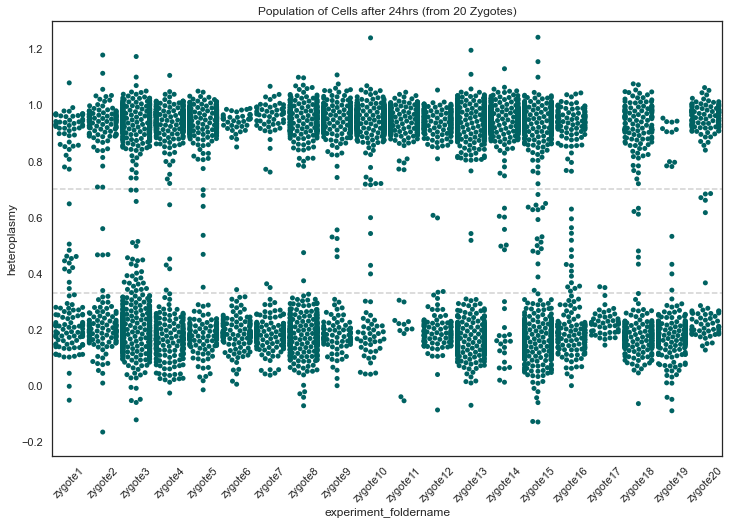

In [64]:
plt.figure(figsize=(12, 8))

sns.swarmplot(data =df, x ='experiment_foldername',y = 'h', color='#006262',  dodge=0.7)
plt.ylabel('heteroplasmy')
plt.title('Population of Cells after 24hrs (from 20 Zygotes)')
plt.xticks(rotation=45)  # Adjust the rotation angle as needed
plt.rcParams['svg.fonttype'] = 'none'
plt.axhline(y=0.33, color='k', linestyle='--', alpha = 0.2) 
#plt.axhline(y=0.5, color='k', linestyle='--', alpha = 0.5) 
plt.axhline(y=0.71, color='k', linestyle='--', alpha = 0.2) 
plt.ylim(-0.25,1.30)
#plt.savefig('24hrs_zygotes_raw_heteroplasmy_swarmplot.svg', transparent = True)

In [13]:
# remove the 2 outliers
mask = (df['h'] <= 1.25) & (df['h'] >= -0.25)
df = df[mask]

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 89.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


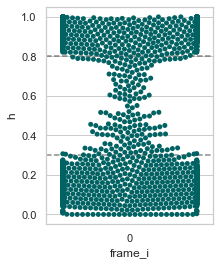

In [88]:
plt.figure(figsize=(3, 4))
sns.swarmplot(data = df, x ='frame_i',y = 'h', color='#006262')
plt.axhline(y=0.71, color='k', linestyle='--', alpha = 0.5) 
plt.axhline(y=0.33, color='k', linestyle='--', alpha = 0.5) 
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('all_cells_from_all_zygotes_after_24hrs_heteroplasmy_swarmplot.svg', transparent = True)

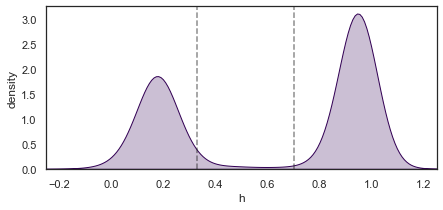

In [61]:
plt.figure(figsize=(7, 3))
sns.kdeplot(df['h'], fill=True, color='#320054')
sns.set_style('white')
# Add vertical lines
plt.axvline(x=0.71, color='k', linestyle='--', alpha=0.5)
plt.axvline(x=0.33, color='k', linestyle='--', alpha=0.5)
plt.xlim(-0.25, 1.25)

plt.ylabel('density')
plt.xlabel('h')

plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('kde_all_cells_24hrs_both_heteroplasmy.svg', transparent = True)

In [62]:
df.to_csv('df_24hrs.csv', index=False)